# Import the needed libraries

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

from sklearn.datasets import load_boston, load_digits, load_iris, load_wine
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import cv2

# Implement SVD

In [ ]:
def svd(X):
    """
    In the image compression, we assume that each coloum of the image is a feature. Image is the matrix X.
    
    Args: 
        X: N * D array corresponding to an image (N*D*3 if color image)
    Return:
        U: N*N (*3 for color images) 
        S: min(N, D)*1 (*3 for color images)
        V: D*D (*3 for color images)
    """ 
    # Get the number of dimensions to decide if it is 2D or 3D
    number_of_dimensions = len(X.shape)

    if number_of_dimensions == 3:
        # Transpose the image for broadcasting
        X = np.transpose(X, (2, 0, 1)) 
        # Apply the SVD
        U, S, V = np.linalg.svd(X, full_matrices=False)
    else:
        # Same thing but with no broadcasting
        U, S, V = np.linalg.svd(X, full_matrices=False)
        
    return U,S,V

# Rebuild the K components using SVD

In [ ]:
def rebuildsvd(U, S, V, k):
    """
    Rebuild SVD by k componments.
    Args: 
        U: N*N (*3 for color images) 
        S: min(N, D)*1 (*3 for color images)
        V: D*D (*3 for color images)  
        k: int corresponding to number of components
    Return:
        Xrebuild: N*D array of reconstructed image (N*D*3 if color image)
        
    Hint: numpy.matmul may be helpful for reconstructing color images
    """
    # Get the number of dimensions to decide if it is 2D or 3D
    number_of_dimensions = len(U.shape)
    
    if number_of_dimensions == 3:
        # Create an empty matrix with size N*D
        Sigma_new = np.zeros((3, U.shape[1], V.shape[1]))
        for j in range(3):
            # Find the new matrix diagonal with S
            np.fill_diagonal(Sigma_new[j, :k, :], S[j, :k])
        # Perform Matrix Multiplication
        Xrebuild = np.matmul(U,np.matmul(Sigma_new,V))
        # Transpose the matrix again to be of size N*D*3
        Xrebuild = np.transpose(Xrebuild, (0,1,2))
    else:
        # Formula
        Xrebuild = np.matrix(U[:, :k]) * np.diag(S[:k]) *np.matrix(V[:k, :])
        
    return Xrebuild

 # Computing compression ratio

In [ ]:
def compression_ratio(X, k):
    """
    Compute compression of an image: (num stored values in compressed)/(num stored values in original)
    Args: 
        X: N * D array corresponding to an image (N * D * 3 if color image)
        k: int corresponding to number of components
    Return:
        compression_ratio: float of proportion of storage used by compressed image
    """
    N = X.shape[0]

    compression_ratio = N/(2*k+1) 
    # In page 12 of: http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf
    # There is explanation for the computation of compression ratio

    return compression_ratio

# Computing the preserved variance

In [ ]:
def recovered_variance_proportion(S, k):
    """
    Compute the proportion of the variance in the original matrix recovered by a rank-k approximation
    
    Args:
       S: min(N, D)*1 (*3 for color images) of singular values for the image
       k: int, rank of approximation
    Return:
       recovered_var: int (array of 3 ints for color image) corresponding to proportion of recovered variance
    """
    number_of_dim = len(S.shape)

    # 2D Image
    if number_of_dim==1:
        eigenval = S**2/(S.shape[0]-1)
        # Get the importance of each eigenvalue
        significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
        # Sort them in a descending order
        significance.sort(reverse =True)
        # Add them till the k-th componenet
        recovered_var = sum(significance[0:k])

        # Or
        """
        explained_variance = S**2/(S.shape[0]-1)
        total_var = explained_variance.sum()
        recovered_var = explained_variance / total_var
        explained_variance = explained_variance[:k]
        recovered_var = np.around(np.sum(recovered_var[:k]),decimals = 3)

        """
    else:
        recovered_var = []

        # Same as 2D but repeat 3 times, one for each dimension.
        for i in range(3):
            current_eigen_val = S[i,:]**2/(S.shape[1]-1) 
            current_significance = [np.abs(i)/np.sum(current_eigen_val) for i in current_eigen_val]
            current_significance.sort(reverse=True)
            current_recovered_var = sum(current_significance[0:k])
            recovered_var.append(current_recovered_var)

    return recovered_var

# Testing the code

We are going to work with the image: "cat.png"

## Gray image



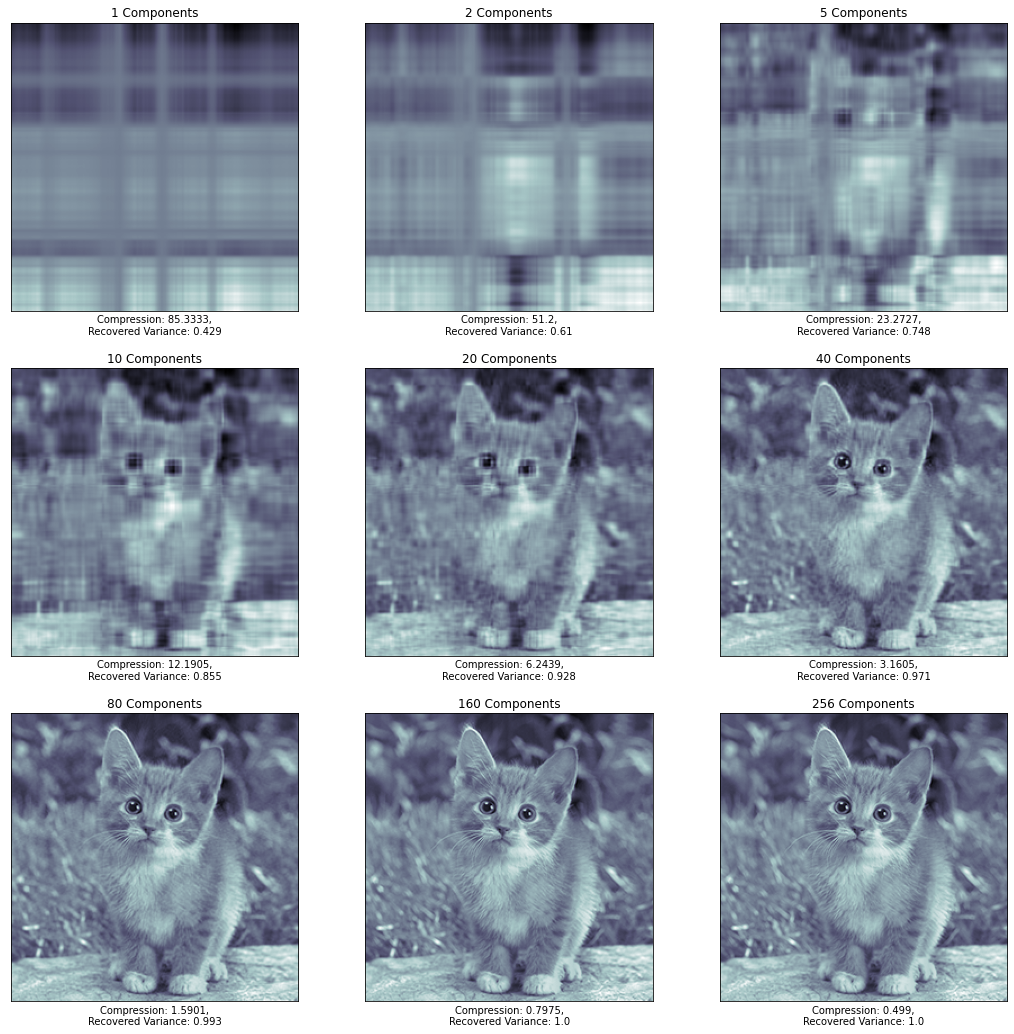

In [ ]:
img = plt.imread("cat.png")
bw_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bw_image_mean = np.mean(bw_image,axis=0)
bw_image -= bw_image_mean

U, S, V = svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,256]
fig = plt.figure(figsize=(18, 18))

# Plot several images
i = 0
for k in component_num:
    img_rebuild = rebuildsvd(U, S, V, k)
    c = np.around(compression_ratio(bw_image, k), 4)
    r = np.around(recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i + 1

## Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


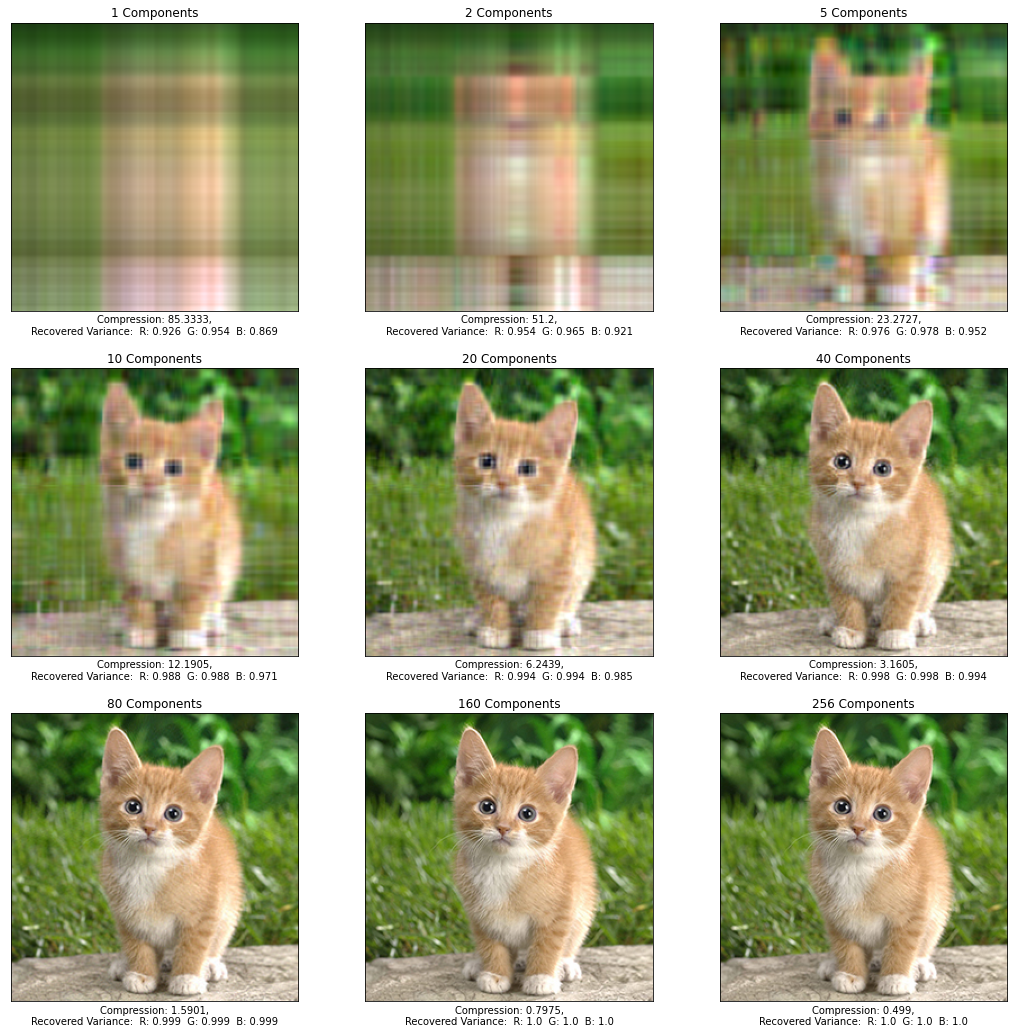

In [ ]:
# Helper do not need to change
U, S, V = svd(img)
component_num = [1,2,5,10,20,40,80,160,256]
fig = plt.figure(figsize=(18, 18))

# Plot several images
i = 0
for k in component_num:
    img_rebuild = rebuildsvd(U, S, V, k)
    img_rebuild = np.transpose(img_rebuild, (1, 2, 0))
    c = np.around(compression_ratio(img_rebuild, k), 4)
    r = np.around(recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i + 1

# Compare our results with Sklearn

In [ ]:
img = plt.imread("cat.png")
bw_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

pca_sklearn = PCA(1).fit(bw_image) 
img_transformed = pca_sklearn.transform(bw_image) 
print(img_transformed.shape) 
print(np.sum(pca_sklearn.explained_variance_ratio_))

(256, 1)
0.42921492


# Implement PCA from Scratch for Data Preprocessing

In [ ]:
def MyPCA(X):
    """
    Decompose dataset into principal components.     
    Args: 
        X: N*D array corresponding to a dataset
    Return:
        U: N*N 
        S: min(N, D)*1 
        V: D*D
    """
    # Center the data (VERY IMPORTANT)
    mean = (np.mean(X,axis = 0))
    # Avoid type cast errors
    mean = mean.astype('int')
    # Subtract the mean
    X -= mean
    # Perform SVD
    U,S,V = svd(X)
    
    return U,S,V

In [ ]:
def intrinsic_dimension(S, recovered_variance=.98):
    """
    Find the number of principal components necessary to recover given proportion of variance
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
        
        recovered_varaiance: float in [0,1].  Minimum amount of variance 
            to recover from given principal components
    Return:
        dim: int, the number of principal components necessary to recover 
            the given proportion of the variance
    """
    # Same as in part 1
    eigenval = S**2/(S.shape[0]-1)
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse =True)
    
    total_var = 0 
    dim = 0

    # Loop over the significance util met the required variance
    while total_var <= recovered_variance:
        total_var += significance[dim]
        dim += 1

    return dim

In [ ]:
def num_linearly_ind_features(S, eps=1e-11):
    """
    Find the number of linearly independent features in dataset
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
    Return:
        dim: int, the number of linearly independent dimensions in our data
    """
    eigenval = S**2/(S.shape[0]-1)
    # Find all eigen values that have more than the threshold
    dim = len([i for i in eigenval if i >= eps])
    
    return dim

# Apply PCA on Data for Regression

In [ ]:
data_boston=load_boston(return_X_y=True)
X=data_boston[0]
y=data_boston[1]
X.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

(506, 13)

In [ ]:
# Apply PCA on the dataset and also find the number of linearly independent and intrinsic components 
def apply_PCA_on_data(X):
    """
      Args:
  X: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
  Return:
  X_pca: pca reduced dataset
  independent_features: number of independent features 
  intrinsic_dimensions: number of intrinsic dimensions
    """
    U,S,V = MyPCA(X)
    # Call functions
    intrinsic_dimensions = intrinsic_dimension(S)
    independent_features = num_linearly_ind_features(S)
    x_pca = U[:, :intrinsic_dimensions] * S[:intrinsic_dimensions]
    return x_pca, independent_features , intrinsic_dimensions

In [ ]:
X_PCA, ind_features, intrinsic_dimensions = apply_PCA_on_data(X)
print("data shape with PCA", X_PCA.shape)
print("Number of independent features" ,ind_features)
print("Number of intrinsic components" ,intrinsic_dimensions)

data shape with PCA (506, 3)
Number of independent features 13
Number of intrinsic components 3


In [ ]:
# Get training and testing data 
X_train , X_test , y_train, y_test = train_test_split(X_PCA,y , test_size = 0.2 , random_state=42)

In [ ]:
# Use SVR for getting predcited labels
clf = SVR()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
# Calculate MSE 
mse_score = mean_squared_error(y_pred, y_test)
print("MSE score with PCA",mse_score)

MSE score with PCA 51.20011782090751


# SVM Regression without PCA

In [ ]:
# Ridge regression without PCA
# Get training and testing data 
X_train , X_test , y_train, y_test = train_test_split(X ,y , test_size = 0.2 , random_state=42)
# Use Ridge Regression for getting predcited labels
clf = SVR()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
# Calculate MSE 
mse_score = mean_squared_error(y_pred, y_test)
print("MSE score without PCA", mse_score)

MSE score without PCA 49.37799345969089


# Us Arrest Dataset

In [ ]:
df_arrest = pd.read_csv("USArrests.csv")
print(df_arrest)
names = df_arrest['Unnamed: 0']
df_arrest.drop(labels="Unnamed: 0",axis=1,inplace=True)
df = df_arrest

        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

This data set contains statistics, in arrests per 100,000 residents
for assault, murder, and rape in each of the 50 US states in 1973.
Also given is the percent of the population living in urban areas.

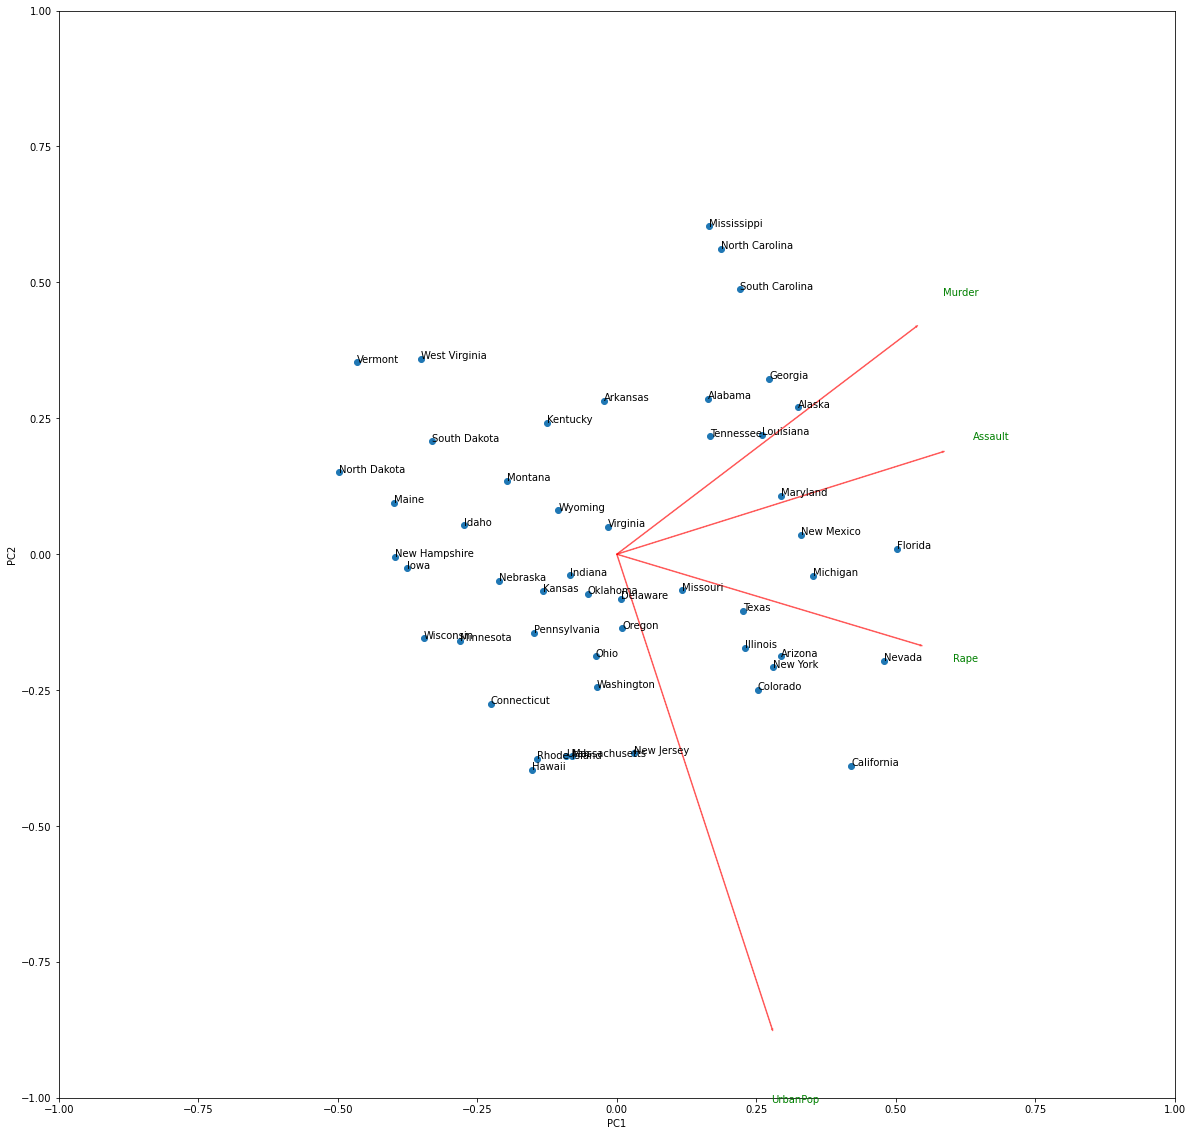

In [ ]:
# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(df_arrest)
df_arrest=scaler.transform(df_arrest)    
pca_sklearn = PCA()
x_new = pca_sklearn.fit_transform(df_arrest)

def biplot(score,coeff,names,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()

    ax.scatter(xs * scalex,ys * scaley)
    for i, txt in enumerate(names):
        ax.annotate(txt, (xs[i] * scalex, ys[i] * scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))

#Call the function. Use only the 2 PCs.
biplot(x_new[:,0:2],np.transpose(pca_sklearn.components_[0:2, :]),names,labels = list(df.columns))
plt.show()

# Feature Scaling Effect on PCA

In [ ]:
def randomly_perturb_data(data, multiplier=2000):
    """
    Multiply a random column in data by multiplier
    
    Inputs:
        data: N*D numpy array of features
        multiplier: multiplier by which to perturb a random column in data
        
    Returns:
        perturbed_data: Data with random column multiplied by multiplier
    """
    # Choose random index
    D = data.shape[1] 
    random_col = np.random.randint(D)
    perturbed_data = data
    # mutliply the values in this index by a multiplier
    perturbed_data[:,random_col] = perturbed_data[:,random_col]*multiplier
    return perturbed_data
   
def scree_plot(X, n_components=10):
    """
    Plot proportion of variance contained in each individual component
    """
    U,S,V = MyPCA(X)
    eigenval = S**2/(X.shape[0]-1)
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse=True)    
    fig = plt.figure(figsize=(8,5))
    plt.plot(list(range(1,len(significance)+1)),np.cumsum(significance))

    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()
    
def plot_component_vector(X):
    U,S,V = MyPCA(X)
    eigenval = S**2/(X.shape[0]-1)
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse=True)    
    fig = plt.figure(figsize=(8,5))
    plt.bar(list(range(len(significance))),significance)
    plt.title('Component Vector Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

In [ ]:
data_iris=load_iris(return_X_y=True)
X_iris=data_iris[0]
y_iris=data_iris[1]
data_wine = load_wine(return_X_y=True)
X_wine = data_wine[0]
y_wine = data_wine[1]
data_boston=load_boston(return_X_y=True)
X_boston=data_boston[0]
y_boston=data_boston[1]

data_iris_m=load_iris(return_X_y=True)
X_iris_m=data_iris_m[0]
y_iris_m=data_iris_m[1]
data_wine_m = load_wine(return_X_y=True)
X_wine_m = data_wine_m[0]
y_wine_m = data_wine_m[1]
data_boston_m=load_boston(return_X_y=True)
X_boston_m=data_boston[0]
y_boston_m=data_boston[1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Apply PCA on all data with and without multiplication

Independent Features and Intrinsic Dimensions with no Multiplication for Iris dataset  4 3
Independent Features and Intrinsic Dimensions after Multiplication for Iris dataset    4 1

Scree plot and Component Vector with No Multiplication


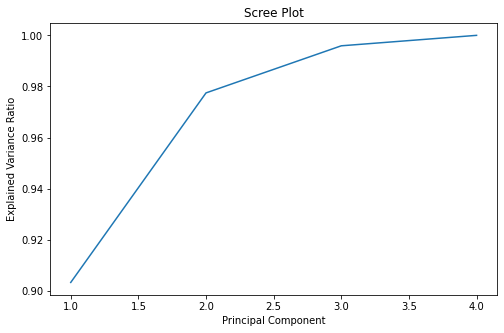

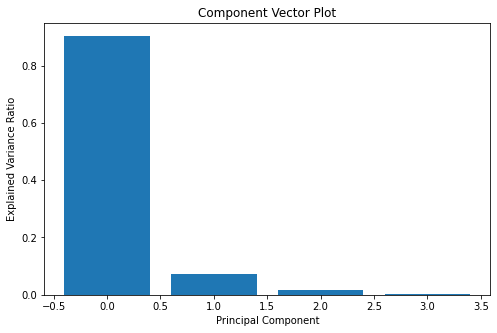

Scree plot and Component Vector with Multiplication


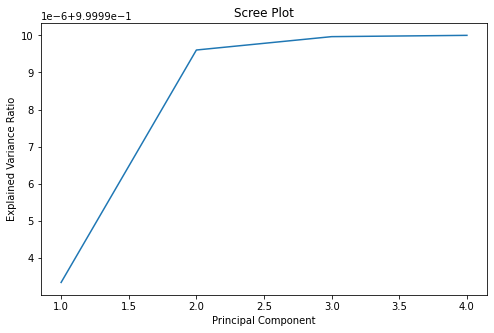

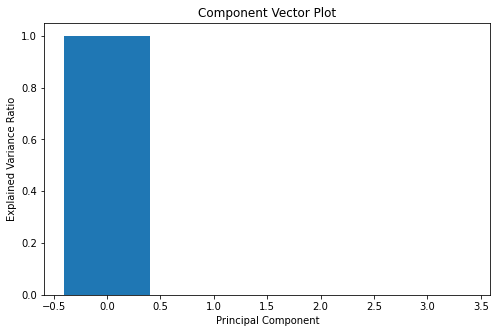

In [ ]:
_, ind_features_iris, intrinsic_dimensions_iris = apply_PCA_on_data(X_iris)
X_iris_m = randomly_perturb_data(X_iris_m)
_, ind_features_iris_m, intrinsic_dimensions_iris_m = apply_PCA_on_data(X_iris_m)
print("Independent Features and Intrinsic Dimensions with no Multiplication for Iris dataset ",ind_features_iris,intrinsic_dimensions_iris)
print("Independent Features and Intrinsic Dimensions after Multiplication for Iris dataset   ",ind_features_iris_m,intrinsic_dimensions_iris_m)
print("\nScree plot and Component Vector with No Multiplication")
scree_plot(X_iris)
plot_component_vector(X_iris)
print("Scree plot and Component Vector with Multiplication")
scree_plot(X_iris_m)
plot_component_vector(X_iris_m)

Independent Features and Intrinsic Dimensions with no Multiplication for Last dataset  13 3
Independent Features and Intrinsic Dimensions after Multiplication for Last dataset    13 1

Scree plot and Component Vector with No Multiplication


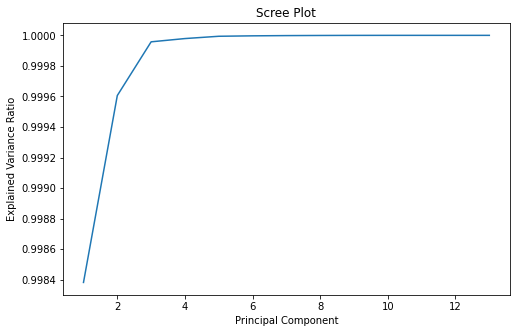

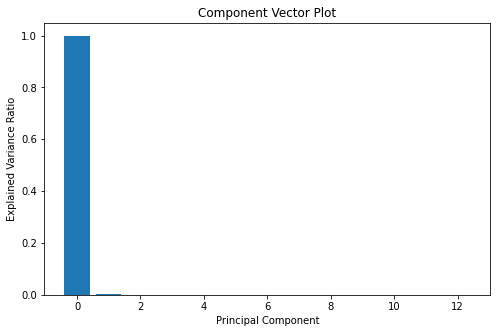

Scree plot and Component Vector with Multiplication


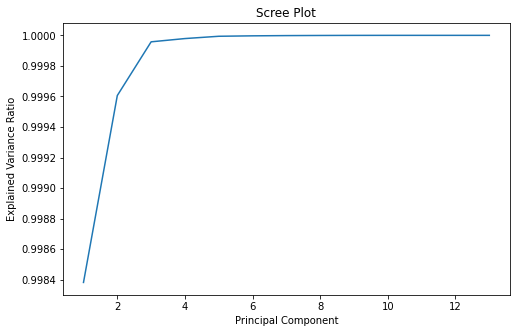

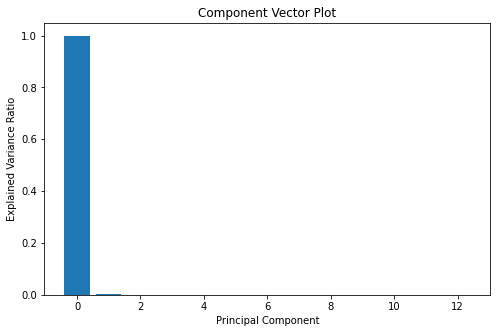

In [ ]:
_, ind_features_npy, intrinsic_dimensions_npy = apply_PCA_on_data(X_boston)
X_npy_m = randomly_perturb_data(X_boston_m)
_, ind_features_npy_m, intrinsic_dimensions_npy_m = apply_PCA_on_data(X_boston_m)
print("Independent Features and Intrinsic Dimensions with no Multiplication for Last dataset ",ind_features_npy,intrinsic_dimensions_npy)
print("Independent Features and Intrinsic Dimensions after Multiplication for Last dataset   ",ind_features_npy_m,intrinsic_dimensions_npy_m)
print("\nScree plot and Component Vector with No Multiplication")
scree_plot(X_boston)
plot_component_vector(X_boston)
print("Scree plot and Component Vector with Multiplication")
scree_plot(X_npy_m)
plot_component_vector(X_npy_m)

# Use PCA for Data Visualization

In [ ]:
def visualize(X,y):
    """
  Args:
  X: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
  y: numpy array (N,), the true labels
  
  Return:
  retained variance: scalar
  """
    # Perform PCA
    U,S,V = MyPCA(X)
    # Same as before
    eigenval = S**2/(X.shape[0]-1)
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse=True)
    # Till second dimension as we want to visualize it!
    recovered_var = sum(significance[0:2])
    
    # The restored data
    reduced_data = U[:, :2] * S[:2]
    colors = ['r','b','y']
    plt.figure(figsize=(8,5))
    for color, i in zip(colors, [0, 1, 2]):
        plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1],marker='x', color=color, alpha=.8, lw=2)
    plt.show()
    return recovered_var

## Use PCA for visualization of iris and wine data

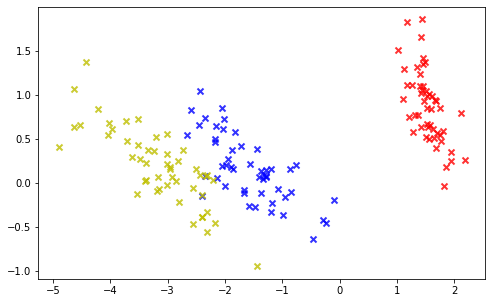

Retained variance for iris dataset 0.9774907426943391


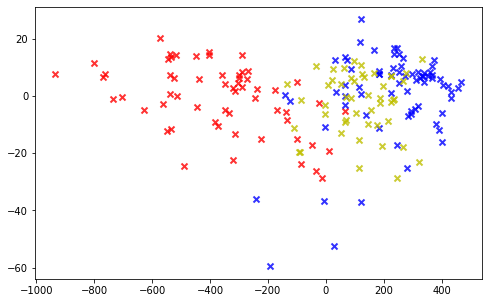

Retained variance for wine dataset 0.9998036218658357


In [ ]:
data_iris=load_iris(return_X_y=True)
X=data_iris[0]
y=data_iris[1]
retained_variance_for_iris=visualize(X,y)
print("Retained variance for iris dataset", retained_variance_for_iris)

data_wine=load_wine(return_X_y=True)
X=data_wine[0]
y=data_wine[1]
retained_variance_for_wine=visualize(X,y)
print("Retained variance for wine dataset", retained_variance_for_wine)

## Visualize the Digit Dataset After reduction

0.2850936482367496


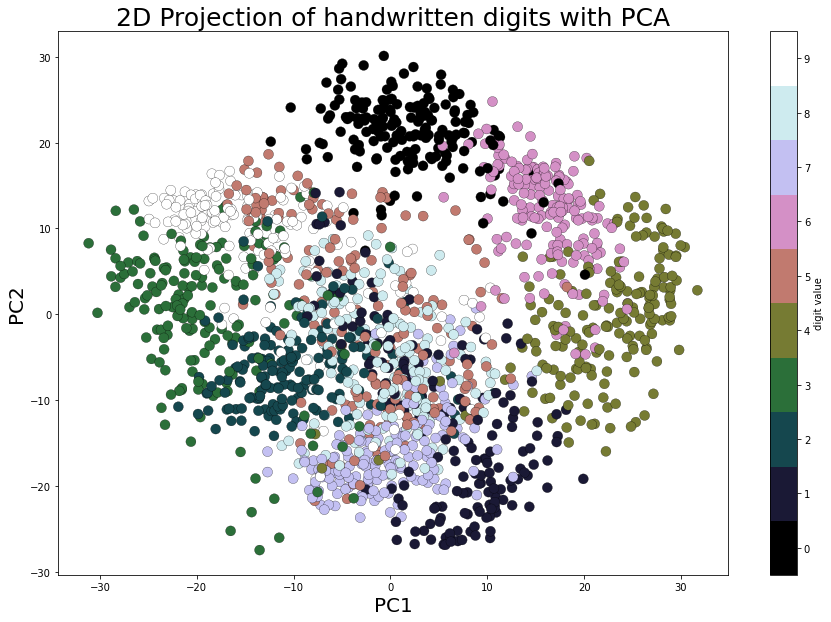

In [ ]:
digits = load_digits() 

pca_digits=PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data) 
print(np.sum(pca_digits.explained_variance_ratio_))
plt.figure(figsize=(15,10))
plt.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, c=digits.target, edgecolor='k', s=100, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('2D Projection of handwritten digits with PCA', size=25)
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)